# HAIT Lab 第二回小テスト(〜決定木)

### 問1 正則化に関する問題（15点）

本問では正弦関数（サインカーブ）に従うようなデータ（点）を多少の誤差を含むようにランダムに10個生成し、それらのデータを多項式回帰を用いて学習させ適切な回帰式を得ることを目指す。その中で正則化を用いることで過学習が改善されることを観察する。

In [29]:
# コード改変禁止

# 必要なライブラリを読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 不要な警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

In [30]:
# コード改変禁止

# 適当なデータセットを生成
# 正弦関数を出力する関数を定義
def f(X):
    return np.sin(X)

# サンプルデータの生成
# 乱数生成器の状態を指定
np.random.seed(3)
# 10個のデータ点を生成
X = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(X)
X = np.sort(X[:15])
# 対応するyを関数で指定
y = f(X)
# 正規分布に従うノイズを加える
y += np.random.normal(0, 0.15, len(y))
# sklearnで扱えるように､一列のベクトルに変換
X = X.reshape(-1, 1)


# 正弦関数をプロットする用のデータを生成
# -10~20の範囲に､0.1刻みでデータ点を取る
X_plot = np.arange(-10, 20, 0.1)
# 対応するyを正弦関数で指定
y_plot = f(X_plot)
# sklearnで扱えるように､一列のベクトルに変換
X_plot = X_plot.reshape(-1, 1)

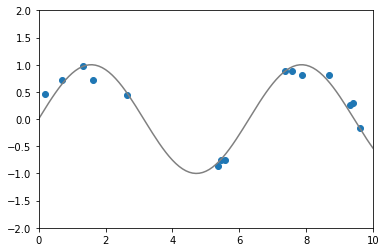

In [31]:
# コード改変禁止

# グラフを描画
# データ点をプロット
plt.scatter(X, y)
# もととなる関数を描画
plt.plot(X_plot, y_plot, color='gray')
# 表示範囲を指定
plt.xlim([0,10])
plt.ylim([-2,2])
# グラフを表示
plt.show()

### （1）今回はまず、あえて過学習をさせるために8次関数で多項式回帰を行う。以下のコードをコメントの指示に従うように書き込み完成させよ。（6点）

In [32]:
# 線形回帰のクラスを読み込み（1点）
from sklearn.linear_model import LinearRegression

# 多項式変換のクラスを読み込み（1点）
from sklearn.preprocessing import PolynomialFeatures

# 線形回帰のインスタンスを生成（1点）
lr = LinearRegression()

# 8次関数用に特徴量を変換するインスタンスを生成（1点）
pol = PolynomialFeatures(degree=16)

# Xを8次関数用に変換（1点）
X_pol = pol.fit_transform(X)
X_pol
# 変換したデータを学習させる（1点）
lr.fit(X_pol, y)

# プロット用のデータも同様に変換
X_plot_pol = pol.fit_transform(X_plot)
# プロット用のデータのyを予測
y_plot_pol = lr.predict(X_plot_pol)

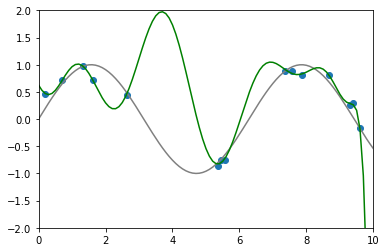

RMSE: 0.025582


In [33]:
# コード改変禁止

# グラフとRMSEを描画
from sklearn.metrics import mean_squared_error as mse

# データ点をプロット
plt.scatter(X, y)
# もととなる正弦関数を描画
plt.plot(X_plot, y_plot, color='gray')
# 通常の多項式回帰のモデルを描画
plt.plot(X_plot, y_plot_pol, color='green')
# 表示範囲を指定
plt.xlim([0,10])
plt.ylim([-2, 2])
# グラフを描画
plt.show()
#RMSEを出力
print("RMSE: %f" % (mse(y, lr.predict(X_pol)) ** (1/2)))

### （2）上で出力したグラフを見ると今回のモデルが過学習していることが分かる。そのためRMSEの値も非常に小さくなっている。では今回の例でRMSEを理論上0にするためには何次以上の関数で多項式回帰をする必要があるか、またその理由も答えよ。（各1点　計2点）

次数：　10　  理由： プロットした点が9次以上の時に全てグラフ上に存在するため

※ただし、実際にコンピュータで計算させると、上記の理論的な次数ではピタリ0にならないと思います。<br>
これは計算の過程で丸め誤差などが発生するためですね。

### （3）Ridge回帰を行い過学習を抑えることを考える。以下のコードをコメントの指示に従うように書き込み完成させよ。（3点）

In [34]:
# Ridge回帰のクラスを読み込み（1点）
from sklearn.linear_model import Ridge

# Ridge回帰のインスタンスを生成（alphaの値は1000にすること）（1点）
model_ridge = Ridge(alpha=1000)

# データを学習させる(1点)
model_ridge.fit(X_pol, y)

Ridge(alpha=1000)

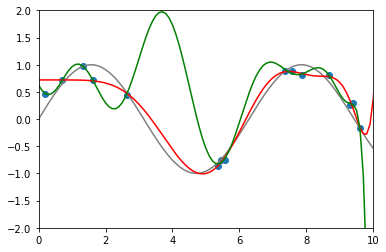

In [35]:
# コード改変禁止

# グラフを描画

# データ点をプロット
plt.scatter(X, y)
# もととなる三次関数を描画
plt.plot(X_plot, y_plot, color='gray')
# Ridge回帰によるモデルを描画
plt.plot(X_plot, model_ridge.predict(X_plot_pol), color='red')
# 通常の多項式回帰のモデルを描画
plt.plot(X_plot, y_plot_pol, color='green')
# 縦の表示範囲を指定
plt.xlim([0,10])
plt.ylim([-2, 2])
# グラフを描画
plt.show()

### （4）LASSO回帰を行い過学習を抑えることを考える。以下のコードをコメントの指示に従うように書き込み完成させよ。（3点）

In [36]:
# LASSO回帰のクラスを読み込み（1点）
from sklearn.linear_model import Lasso

# LASSO回帰のインスタンスを生成（alphaの値は1000にすること）（1点）
model_lasso = Lasso(alpha=1000)

# データを学習させる（1点）
model_lasso.fit(X_pol, y)

Lasso(alpha=1000)

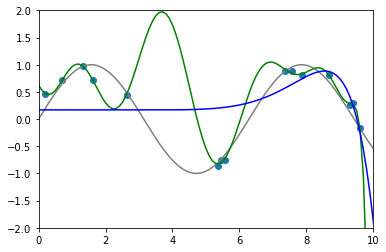

In [37]:
# コード改変禁止

# グラフを描画する

# データ点をプロット
plt.scatter(X, y)
# もととなる三次関数を描画
plt.plot(X_plot, y_plot, color='gray')
# 通常の多項式回帰によるモデルを描画
plt.plot(X_plot, y_plot_pol, color='green')
# LASSO回帰によるモデルを描画
plt.plot(X_plot, model_lasso.predict(X_plot_pol), color='blue')
# 縦の表示範囲を指定
plt.xlim([0,10])
plt.ylim([-2, 2])
# グラフを描画
plt.show()

### （5）以上の結果より、今回の例ではRidge回帰とLASSO回帰のどちらの正則化がより適していると言えるか。（1点）

ここに回答： Ridge回帰

## 問2　分類・グリッドサーチ（15点）

ワインデータセットを用いて、'quality'が６以上の時は1、５以下の時は0として、２種類のワインに分類することを考える。

In [38]:
# コード改変禁止
# データのインポート
data = pd.read_csv('test_data.csv')
# 'quality' が６以上の時は「１」、５以下の時は「０」に置き換える。
data['quality'] = np.where(data['quality'] > 5, 1, 0)
## qualityが 0, 1になっていることを確認
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### （1）以下の指示にしたがってデータの前処理を行いなさい。（4点）

In [39]:
#データセットの分割に必要なライブラリをインポート（1点）
from sklearn.model_selection import train_test_split

# Xに全ての説明変数, yに'quality'の値を代入(2点)
# ただし、scikit-learnの仕様により、yを１列のベクトルに変換しなければならない事に注意すること。(.reshape(-1)を使う)
X = data.loc[:, ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
y = data.loc[:, ['quality']].values.reshape(-1)
# データセットの分割（テストデータの割合を25%にすること）（1点）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### （2）グリッドサーチのモデルを生成しなさい。その際、アルゴリズムはランダムフォレストを使い、データの分割は層化交差検証法(分割数は3)を使ってください。パラメータは、'n_estimators':[400, 500, 600], 'max_depth':[3, 4]とすること。（6点）

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# データの分割方法を指定（層化）（2点）
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

# パラメータの設定（2点）
param = {'n_estimators':[400, 500, 600],
         'max_depth':[3, 4]}

# グリッドサーチのモデルのインスタンスを作成（2点）
grid_s = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=100), param, cv=kf)


### （3）以下の指示にしたがってモデルの学習を行い精度を評価せよ。（5点）

In [41]:
# モデルの学習（2点） *時間がかかる可能性あり
grid_s.fit(X_train, y_train)

In [ ]:
# グリッドサーチの結果、最も良かったパラメータの組み合わせを出力（1点）
grid_s.best_params_

{'max_depth': 4, 'n_estimators': 600}

In [ ]:
# その時の精度を出力（1点）
grid_s.best_score_

0.7522848788638262

In [ ]:
#実際の（テストデータに対する）正答率を出力（1点）
grid_s.score(X_test, y_test)

0.775